In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cal_a_hat_and_b_hat(x0):
    x1 = []
    for i in range(len(x0)):
        x1.append(np.sum(x0[:i+1]))
    x1 = np.array(x1)

    z1 = []
    for i in range(len(x1)):
        if i == 0:
            z1.append(0)
        else:
            z1.append(np.mean([x1[i-1], x1[i]]))
    z1 = np.array(z1)

    Y = np.mat(x0[1:]).transpose()
    B = np.concatenate((np.mat(-z1[1:]).transpose(),
                        np.ones(len(z1[1:])).reshape(-1,1)),
                       axis=1)
    a_hat, b_hat = np.array(np.linalg.inv(B.transpose().dot(B)).dot(B.transpose()).dot(Y)).flatten()
    return a_hat, b_hat

In [4]:
def cal_x0_hat(k, x0, a_hat, b_hat):
    return (x0[0] - b_hat/a_hat) * (1 - np.exp(a_hat)) * np.exp(-a_hat*k)

In [5]:
def cal_c(x0, a_hat, b_hat):
    x0_hat = cal_x0_hat(np.linspace(1, len(x0), len(x0)), x0, a_hat, b_hat)
    e0 = x0 - x0_hat
    return np.var(e0) / np.var(x0)

In [6]:
np.linspace(0,9,10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [7]:
def predict(x0, translation):
    print(x0[0] - translation)
    plt.scatter(range(len(x0)), x0, label='original data')
    a_hat, b_hat = cal_a_hat_and_b_hat(x0 - translation)
    print('a = ' + str(a_hat), ', b = ' + str(b_hat))
    x_list = np.linspace(0, 8, 9)
    y_list = cal_x0_hat(x_list, x0 - translation, a_hat, b_hat)
    y_list = np.concatenate(([x0[0]-translation], y_list))
    print(x_list)
    print(y_list)
    plt.plot(np.linspace(0, 9, 10), y_list + translation, c='red', linestyle='--', label='grey prediction curve')
    plt.legend()
    plt.title('Grey Prediction Results')
    plt.savefig('灰色预测结果.png')
    print('c = ' + str(cal_c(x0, a_hat, b_hat)))

0.22999999999999998
a = 0.3114604741826815 , b = 0.24408596732843185
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0.23       0.20232527 0.14817828 0.1085223  0.07947919 0.05820869
 0.04263068 0.03122171 0.02286605 0.01674656]
c = 1.5552372674654957
10001.0
a = -5.4892327696898224e-06 , b = 10001.174653209833
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[10001.         10001.20210144 10001.25700052 10001.31189989
 10001.36679957 10001.42169956 10001.47659984 10001.53150042
 10001.58640131 10001.64130249]
c = 0.27608139557324657


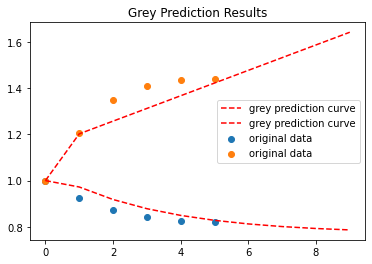

In [8]:
x0 = np.array([1, .924, .875, .842, .827, .823])
predict(x0, .77)
x0 = np.array([1, 1.206, 1.349, 1.407, 1.434, 1.438])
predict(x0, -10000)

0.27793795878296385

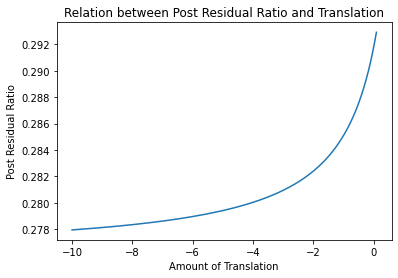

In [9]:
x0 = np.array([1, 1.206, 1.349, 1.407, 1.434, 1.438])
x_list = []
c_list = []
for i in range(-1000,10):
    x_list.append(i/100)
    x0_translation = x0 - i / 100
    a_hat, b_hat = cal_a_hat_and_b_hat(x0_translation)
    c_list.append(cal_c(x0_translation, a_hat, b_hat))

plt.plot(np.array(x_list), c_list)
plt.title('Relation between Post Residual Ratio and Translation')
plt.xlabel('Amount of Translation')
plt.ylabel('Post Residual Ratio')
plt.savefig('后残差比与平移量的关系.png')

np.min(c_list)

In [32]:
def f1(t):
    return .2024 * np.exp(.0623 * t - 1.5575) + .77

In [39]:
def f2(t):
    return 1.023 + .263 * np.log((30 - t) / 5)

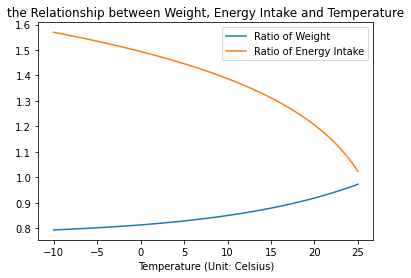

In [47]:
x = np.linspace(-10, 25, 100)
plt.plot(x, f1(x), label='Ratio of Weight')
plt.plot(x, f2(x), label='Ratio of Energy Intake')
plt.legend()
plt.xlabel('Temperature (Unit: Celsius)')
plt.title('the Relationship between Weight, Energy Intake and Temperature')
plt.savefig('体重-摄入能与温度的关系.png')
